# 차원 축소 - PCA (Principal Component Analysis)

![PCA-LDA](https://d.pr/i/hI0WaD+)

- PCA는 데이터를 가장 잘 설명할 수 있는, 데이터의 분산을 최대화하는 방향으로 축을 결정

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


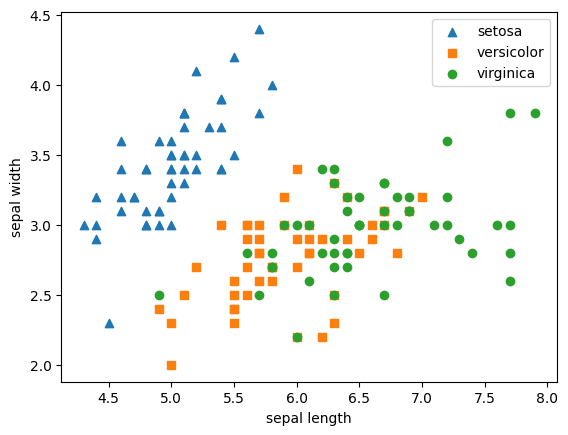

In [57]:
# 특성 선택을 통한 시각화 (2개의 특성만 선택하여 시각화)
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_df[iris_df['target'] == i]['sepal length (cm)']
    y = iris_df[iris_df['target'] == i]['sepal width (cm)']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [58]:
from sklearn.decomposition import PCA

# 2개의 차원으로 차원 축소
pca = PCA(n_components=2)

X = iris_df.iloc[:, :-1]

# 차원 축소 진행
pca.fit(X)
iris_pca = pca.transform(X)

iris_pca_df = pd.DataFrame(iris_pca, columns=['pca_col1', 'pca_col2'])
iris_pca_df['target'] = iris_data.target

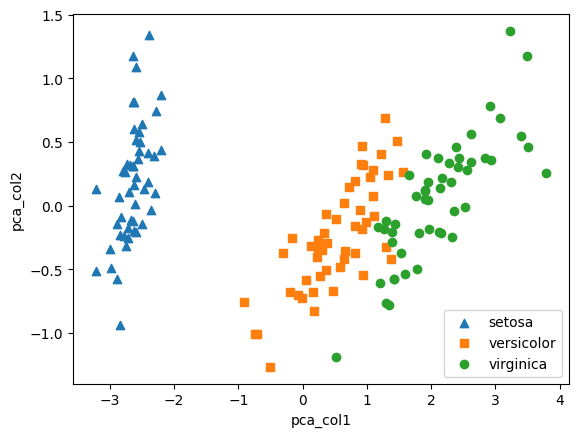

In [59]:
# 차원 축소 시각화
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x = iris_pca_df[iris_pca_df['target'] == i]['pca_col1']
    y = iris_pca_df[iris_pca_df['target'] == i]['pca_col2']
    plt.scatter(x, y, marker=marker, label=iris_data.target_names[i])
    
plt.legend()
plt.xlabel('pca_col1')
plt.ylabel('pca_col2')
plt.show()

In [60]:
# 원본 데이터와 PCA 차원 축소 데이터를 이용한 교차 검증 (학습 및 평가)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr_clf = LogisticRegression(max_iter=1000)
scores = cross_val_score(lr_clf, iris_data.data, iris_data.target, cv=5)
print("원본 데이터 평가:", np.mean(scores))

lr_clf_pca = LogisticRegression(max_iter=1000)
pca_scores = cross_val_score(lr_clf_pca, iris_pca_df[['pca_col1', 'pca_col2']], iris_pca_df['target'], cv=5)
print("PCA 데이터 평가:", np.mean(pca_scores))

원본 데이터 평가: 0.9733333333333334
PCA 데이터 평가: 0.96


### PCA 과일 이미지 데이터

- 흑백 이미지 데이터 픽셀값 0(흑)~255(백)

In [61]:
fruits = np.load('./data/fruits_300.npy')
fruits.shape    # (300, 100, 100) = 300개의 이미지 * 100행 * 100열

(300, 100, 100)

In [62]:
# 이미지 시각화 함수
def draw_fruits(arr, ratio=1):
    N = len(arr)
    rows = int(np.ceil(N / 10))
    cols = N if rows < 2 else 10
    fig, ax = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < N:
                ax[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            ax[i, j].axis('off')
    
    plt.show()

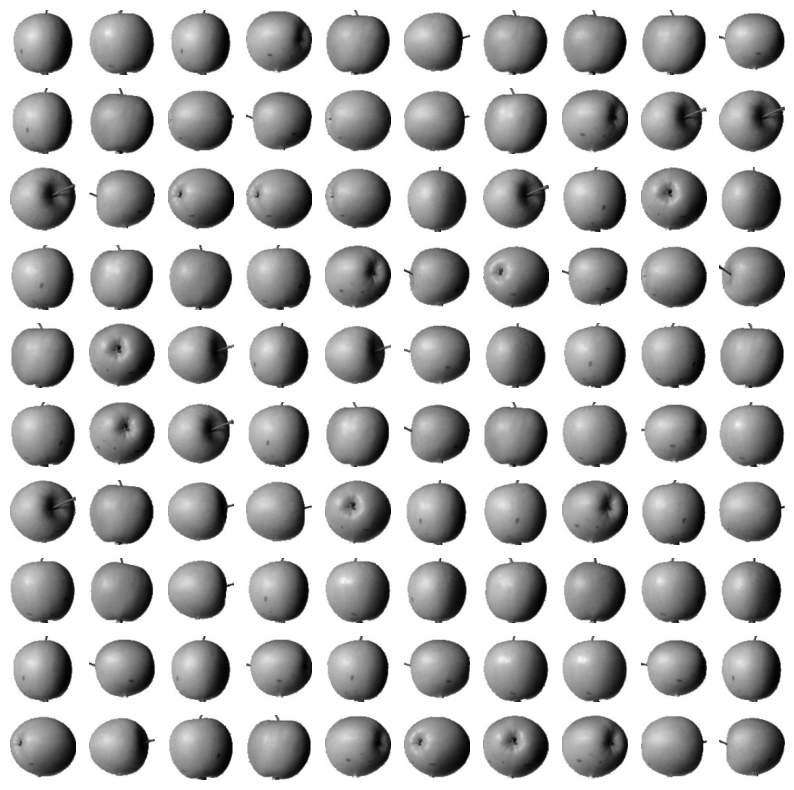

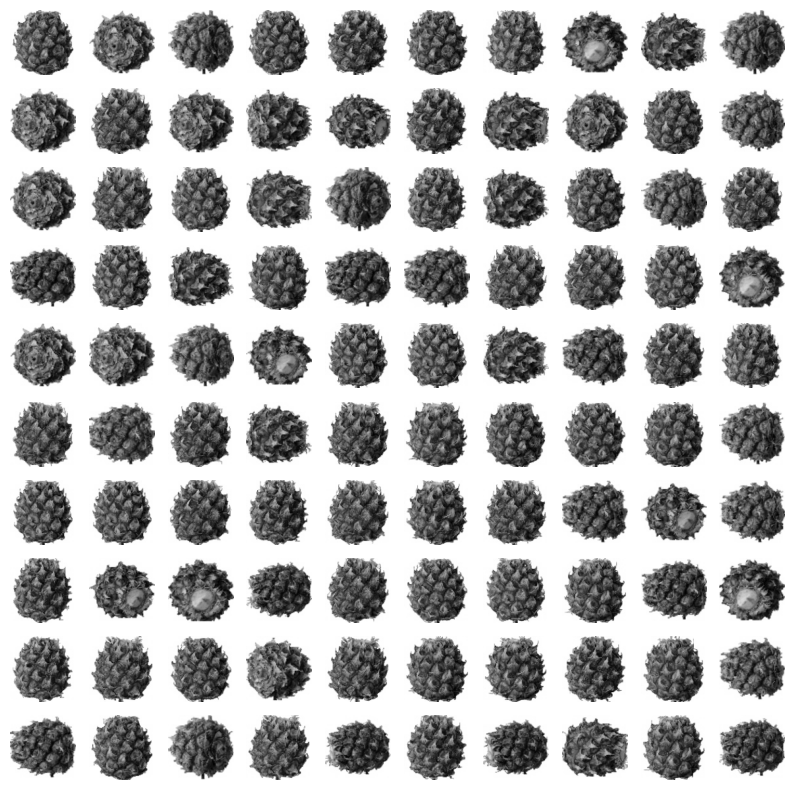

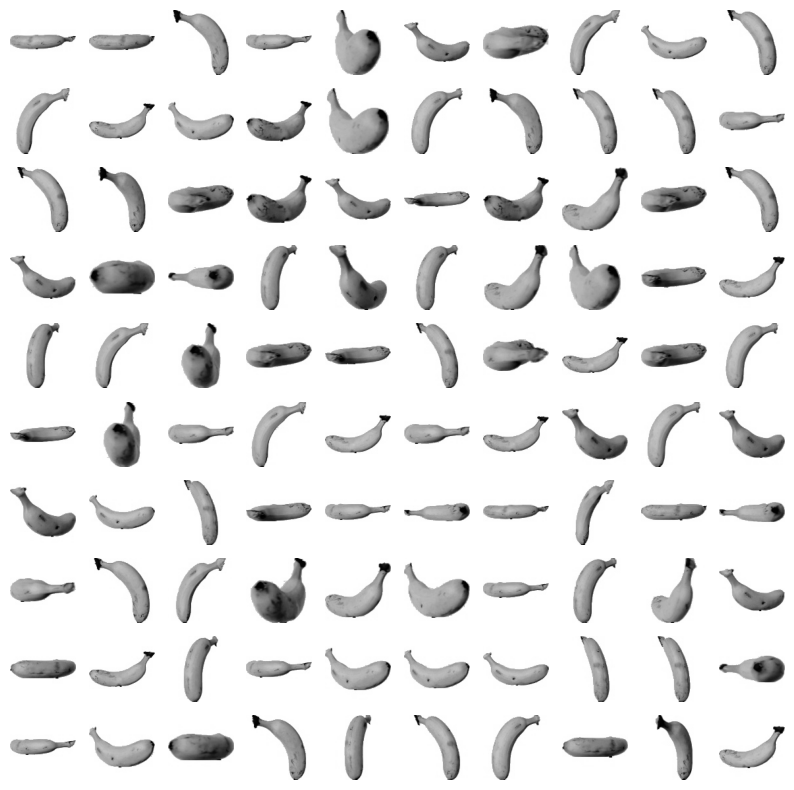

In [63]:
draw_fruits(fruits[:100])
draw_fruits(fruits[100:200])
draw_fruits(fruits[200:])

In [64]:
# 1차원 데이터로 펼치기
fruits_1d = fruits.reshape(300, 100 * 100)
fruits_1d.shape

(300, 10000)

In [65]:
# 50 차원으로 차원 축소
pca = PCA(n_components=50)
pca.fit(fruits_1d)

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [66]:
# 주성분 벡터 확인
pca.components_.shape   # (50, 10000) = (PCA로 구현한 주성분 개수, 원본 데이터 특성 개수)

(50, 10000)

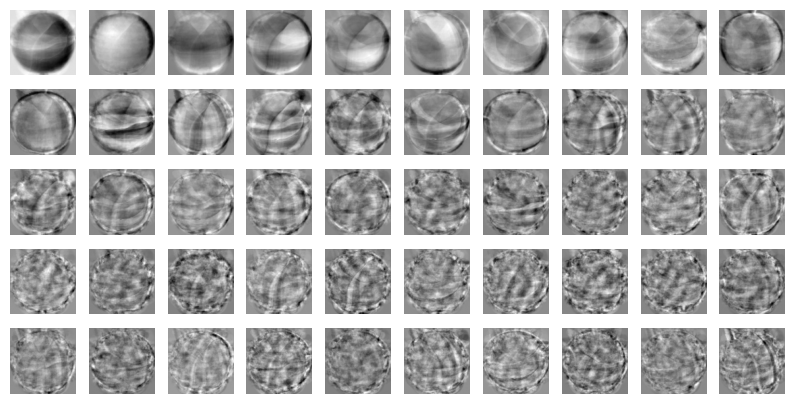

In [67]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [68]:
# 차원 축소 데이터 저장
fruits_pca = pca.transform(fruits_1d)
print(fruits_pca.shape)

np.save('./data/fruits_pca.npy', fruits_pca)

(300, 50)


In [69]:
# 차원 축소 데이터 로드
fruits_pca = np.load('./data/fruits_pca.npy')

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578896 0.00511202
 0.00486382 0.00480347 0.00447837 0.00437316 0.00408042 0.0038947
 0.00372443 0.0035928  0.00331478 0.00317852 0.00304338 0.00303729
 0.0028893  0.00275867 0.00264949 0.00255842 0.00252125 0.0024736
 0.00239692 0.00230421 0.00221936 0.00216971 0.00213546 0.00196814
 0.00192286 0.001907   0.0018546  0.00181644 0.00173868 0.00169096
 0.00163636 0.00159801]
0.9215875444908878


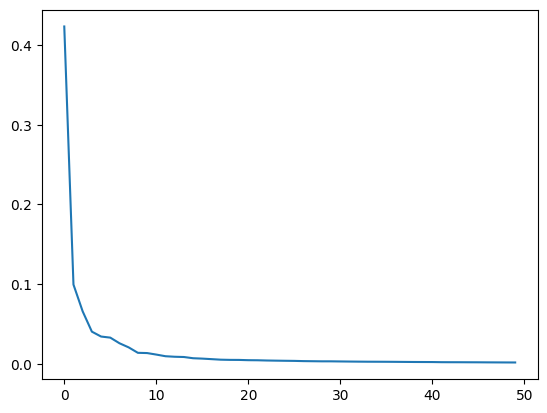

In [70]:
# 주성분 설명 비율 확인
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [71]:
# 타겟 데이터 설정
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [72]:
# cross_val_score : 각 cv의 점수 반환
# cross_validate : 각 cv의 학습시간, 테스트시간, cv의 점수 반환 (평가지표 여러 개 사용 가능)
from sklearn.model_selection import cross_validate

# 원본 데이터 교차검증 점수 확인
lr_clf = LogisticRegression(max_iter=1000)
result = cross_validate(lr_clf, fruits_1d, target, cv=3)
print("원본 데이터 교차검증")
print(result)

# PCA 데이터 교차검증 점수 확인
lr_clf_pca = LogisticRegression(max_iter=1000)
pca_result = cross_validate(lr_clf_pca, fruits_pca, target, cv=3)
print("PCA 데이터 교차검증")
print(pca_result)

원본 데이터 교차검증
{'fit_time': array([0.16890073, 0.15529633, 0.14897203]), 'score_time': array([0.00254607, 0.00201535, 0.00301909]), 'test_score': array([1.  , 1.  , 0.99])}
PCA 데이터 교차검증
{'fit_time': array([0.00836349, 0.00647402, 0.00599718]), 'score_time': array([0.        , 0.00100827, 0.00101781]), 'test_score': array([1.  , 1.  , 0.99])}


In [73]:
# 차원 축소 데이터를 원본 형태로 복구 
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

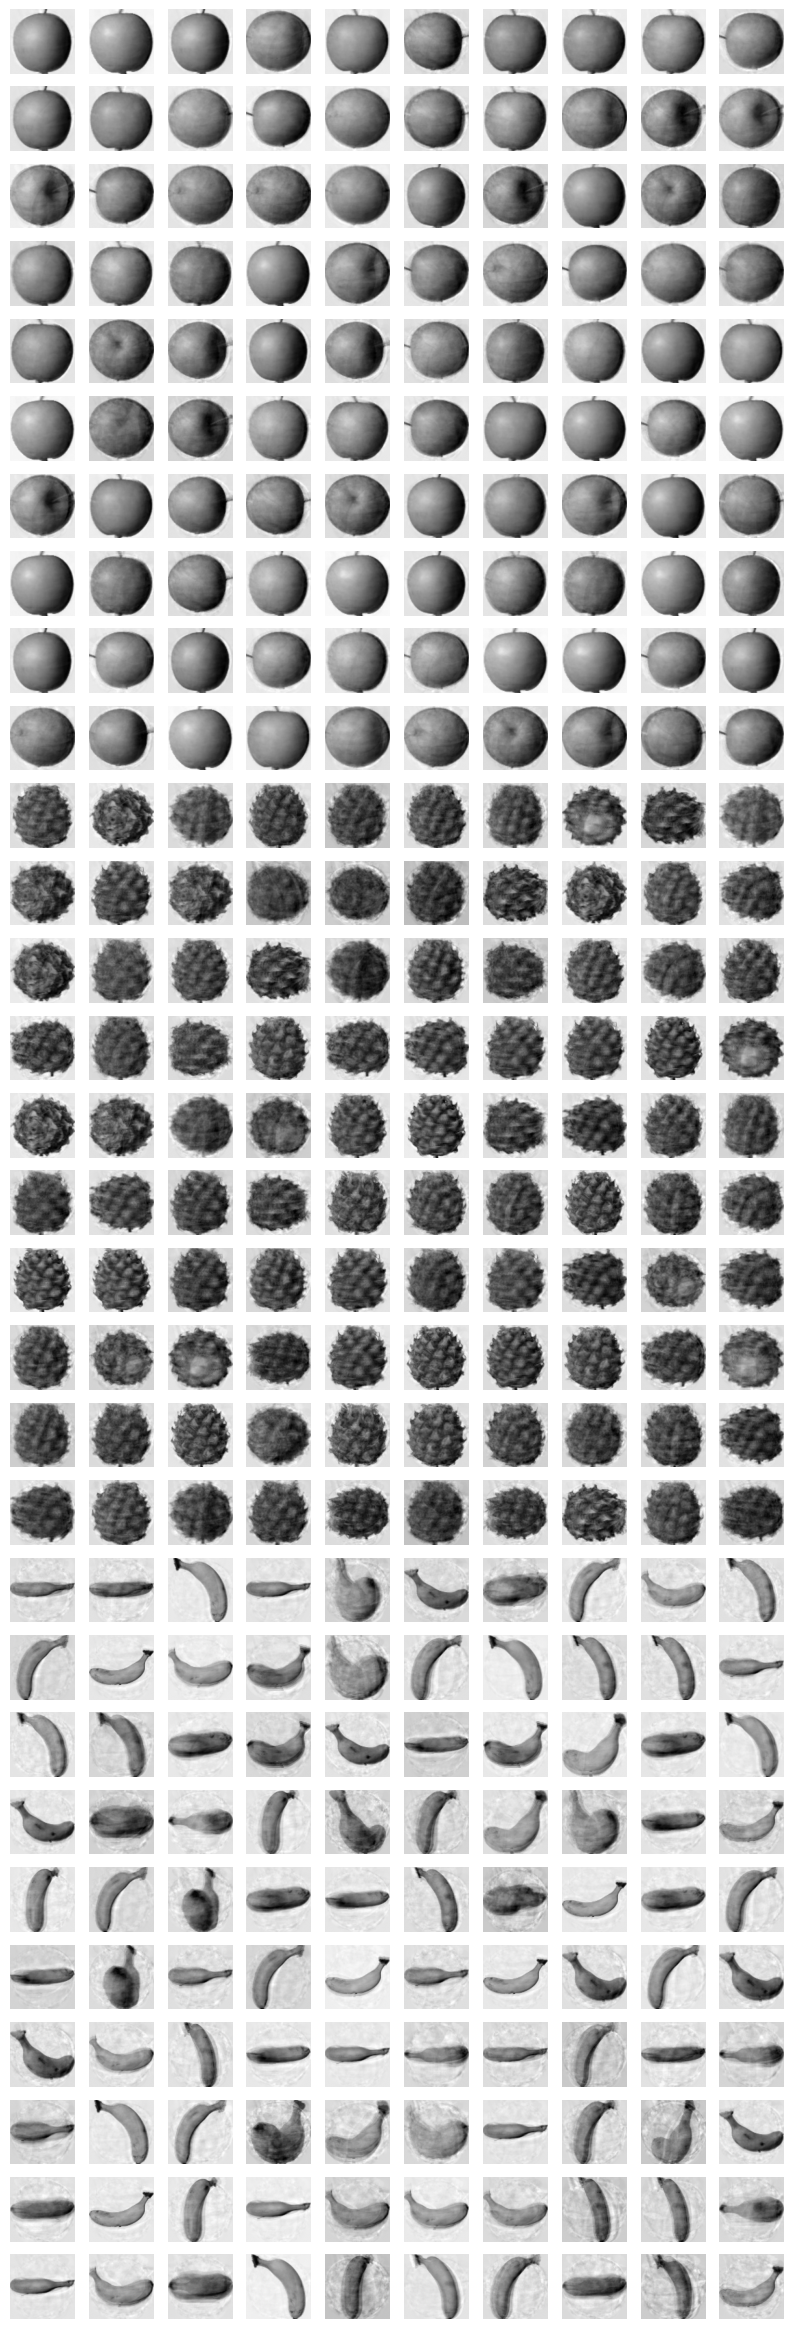

In [74]:
# 복구 데이터 시각화
draw_fruits(fruits_inverse.reshape(-1, 100, 100))